In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,Date,Blood_Type,Region,Demand,Event
0,2021-01-31,A+,North,521,Emergency
1,2021-01-31,A+,South,537,Normal
2,2021-01-31,A+,East,444,Normal
3,2021-01-31,A+,West,247,Normal
4,2021-01-31,A-,North,205,Normal


In [5]:
df.isnull()

,Date,Blood_Type,Region,Demand,Event
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1147,False,False,False,False,False
1148,False,False,False,False,False
1149,False,False,False,False,False
1150,False,False,False,False,False


In [6]:
from sklearn.preprocessing import LabelEncoder 

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Blood_Type,Region,Demand,Event
0,2021-01-31,A+,North,521,Emergency
1,2021-01-31,A+,South,537,Normal
2,2021-01-31,A+,East,444,Normal
3,2021-01-31,A+,West,247,Normal
4,2021-01-31,A-,North,205,Normal


In [9]:
encoder = {}
category = ['Blood_Type','Region','Event']

for col in category:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoder[col] = le

In [10]:
df.head()

,Date,Blood_Type,Region,Demand,Event
0,2021-01-31,0,1,521,0
1,2021-01-31,0,2,537,2
2,2021-01-31,0,0,444,2
3,2021-01-31,0,3,247,2
4,2021-01-31,1,1,205,2


In [11]:
df.isnull().sum()

Date          0
Blood_Type    0
Region        0
Demand        0
Event         0
dtype: int64

In [12]:
df['Blood_Type'].unique()

array([0, 1, 4, 5, 2, 3, 6, 7])

In [13]:
import matplotlib.pyplot as plt

In [14]:
demand = df.groupby('Date')['Demand'].sum()

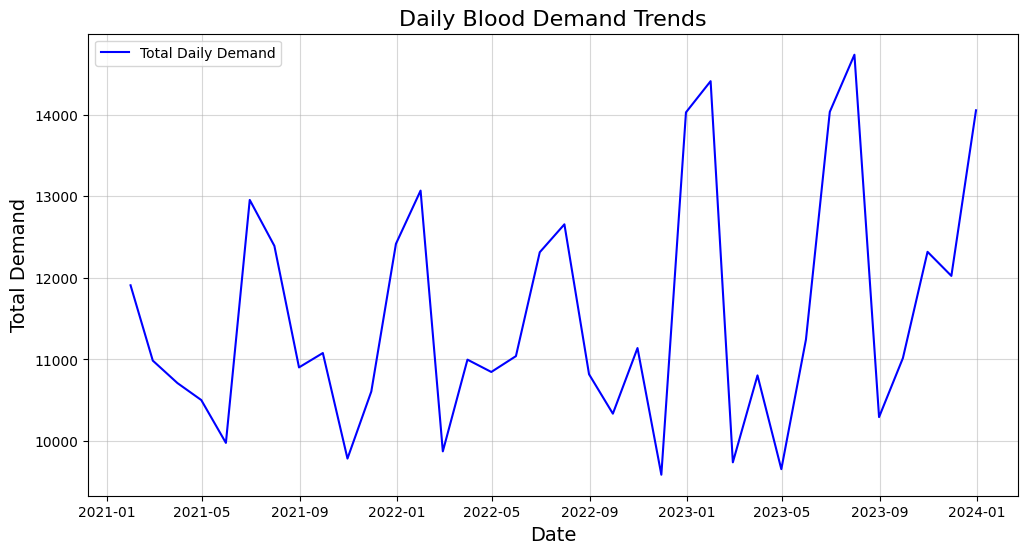

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(demand.index, demand.values, label='Total Daily Demand', color='blue')
plt.title('Daily Blood Demand Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Demand', fontsize=14)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
import joblib

In [17]:
df2 = df.copy

In [18]:
X = df.drop(columns=['Demand','Date'])
Y = df['Demand']

In [19]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [20]:
rf_model = RandomForestRegressor(n_estimators=300,random_state=42)
rf_model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [21]:
Y_pred = rf_model.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)

In [22]:
mse

20016.180738598392

In [23]:
Y_pred

array([368.96767114, 332.2061641 , 326.32282707, 308.46928283,
       358.1096844 , 360.52139129, 358.80395145, 599.02862698,
       346.29529239, 326.32282707, 359.72800634, 316.94713976,
       508.20344444, 273.8765615 , 347.34603244, 401.28327381,
       377.50914878, 342.60172389, 316.94713976, 332.59757642,
       623.12177778, 599.02862698, 472.51222222, 548.76986508,
       323.09225549, 378.19873107, 340.75270723, 330.19401053,
       378.19873107, 340.75270723, 332.59757642, 347.34603244,
       359.72800634, 330.19401053, 301.38265202, 357.36291575,
       317.7756502 , 273.8765615 , 357.36291575, 323.84194048,
       310.34953112, 341.07768188, 342.60172389, 347.90264949,
       347.0392286 , 273.8765615 , 341.07768188, 346.29529239,
       358.1096844 , 368.96767114, 369.10084978, 347.90264949,
       328.98274998, 378.19873107, 338.60953006, 322.34830923,
       369.10084978, 301.38265202, 347.90264949, 472.51222222,
       373.87648393, 500.43255556, 377.50914878, 338.60

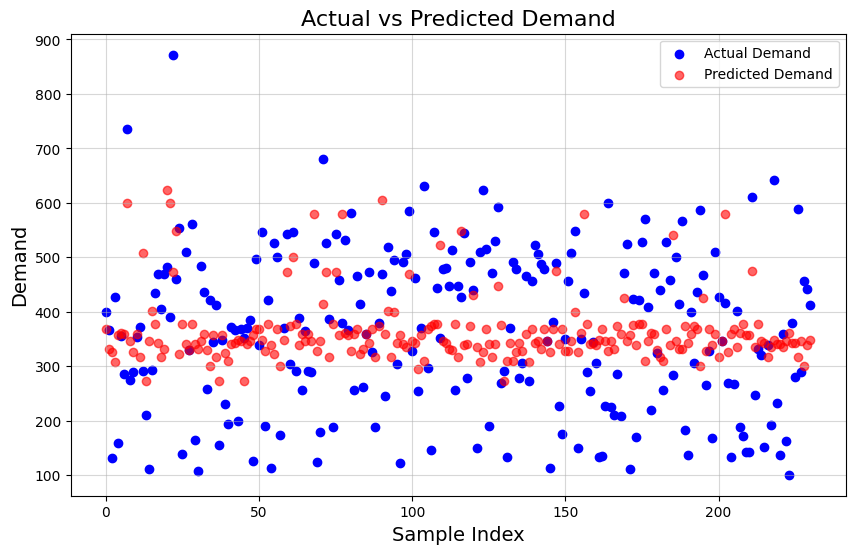

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual Demand')
plt.scatter(range(len(Y_pred)), Y_pred, color='red', label='Predicted Demand', alpha=0.6)
plt.title('Actual vs Predicted Demand', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

   Actual   Predicted
0     399  368.967671
1     366  332.206164
2     131  326.322827
3     427  308.469283
4     159  358.109684
5     356  360.521391
6     285  358.803951
7     736  599.028627
8     275  346.295292
9     290  326.322827


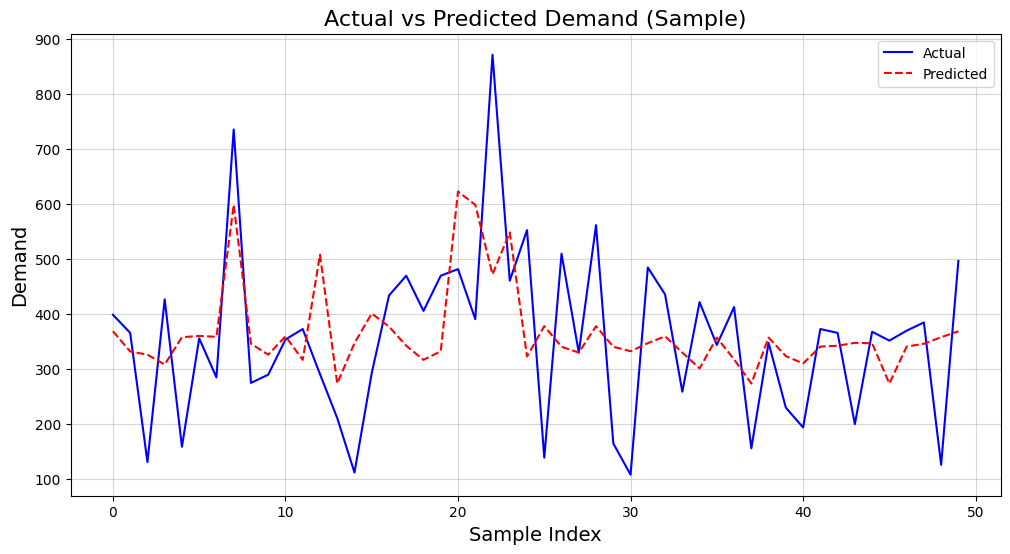

In [25]:
comparison = pd.DataFrame({'Actual': Y_test.values[:10], 'Predicted': Y_pred[:10]})
print(comparison)

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values[:50], label='Actual', color='blue')
plt.plot(Y_pred[:50], label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Demand (Sample)', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save("forecast.h5")

NameError: name 'df2' is not defined

In [27]:
df.head(10)


,Date,Blood_Type,Region,Demand,Event
0,2021-01-31,0,1,521,0
1,2021-01-31,0,2,537,2
2,2021-01-31,0,0,444,2
3,2021-01-31,0,3,247,2
4,2021-01-31,1,1,205,2
5,2021-01-31,1,2,345,2
6,2021-01-31,1,0,144,2
7,2021-01-31,1,3,242,2
8,2021-01-31,4,1,265,2
9,2021-01-31,4,2,376,2
